<a href="https://colab.research.google.com/github/anoldKupara/Machine-Learning-Course/blob/main/pima_indians_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load packages

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.model_selection as mod
import sklearn.neighbors as nei
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, precision_recall_curve, average_precision_score 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import operator
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url="https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv"

In [3]:
#Load CSV file using Pandas

pima = pd.read_csv(url)

In [4]:
#Check the DataFrame & Descriptive Statistics and Analysis of Pima Indians Dataset¶

# Check dimension of the DataFrame

pima.shape

(768, 9)

In [5]:
# Check the type of 'pima'
type(pima)

pandas.core.frame.DataFrame

In [6]:
# Get row indices 

pima_row_idx = pima.index
pima_row_idx

RangeIndex(start=0, stop=768, step=1)

In [7]:
# Get the column names 

pima_col_idx = pima.columns
pima_col_idx

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
# Get data type for each attribute 

pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
# Check the first 5 rows

pima.head (5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# Check missing values

pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# Create Nutritional status column 

Nutritional_status = pd.Series([])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
# Nutritional status based on BMI

for i in range(len(pima)): 
    if pima['BMI'][i] == 0.0: 
        Nutritional_status[i]="NA"
    
    elif pima['BMI'][i] < 18.5: 
        Nutritional_status[i]="Underweight"
        
    elif pima['BMI'][i] < 25: 
        Nutritional_status[i]="Normal"
  
    elif pima['BMI'][i] >= 25 and pima['BMI'][i] < 30: 
        Nutritional_status[i]="Overweight"
  
    elif pima['BMI'][i] >= 30: 
        Nutritional_status[i]="Obese"
        
    else: 
        Nutritional_status[i]= pima['BMI'][i]

In [13]:
# Insert new column - Nutritional Status
pima.insert(6, "Nutritional Status", Nutritional_status)

In [14]:
# Check df containing new column
pima.head (5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,Obese,0.627,50,1
1,1,85,66,29,0,26.6,Overweight,0.351,31,0
2,8,183,64,0,0,23.3,Normal,0.672,32,1
3,1,89,66,23,94,28.1,Overweight,0.167,21,0
4,0,137,40,35,168,43.1,Obese,2.288,33,1


In [15]:
pima['Nutritional Status'].value_counts()

Obese          472
Overweight     179
Normal         102
NA              11
Underweight      4
Name: Nutritional Status, dtype: int64

In [16]:
# Create OGTT_Interpretation (Interpretation of Glucose level) column 

OGTT_Interpretation = pd.Series([])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# Interpretation of OGTT (Glucose) - using OGTT levels recommended by DIABETES UK (2019)

for i in range(len(pima)): 
    if pima['Glucose'][i] == 0.0: 
        OGTT_Interpretation [i]="NA"
    
    elif pima['Glucose'][i] <= 140: 
        OGTT_Interpretation [i]="Normal"
    
    elif pima['Glucose'][i] > 140 & pima['Glucose'][i] <= 198: 
        OGTT_Interpretation [i]="Impaired Glucose Tolerance"
        
    elif pima['Glucose'][i] > 198: 
        OGTT_Interpretation[i]="Diabetic Level"
        
    else: 
        OGTT_Interpretation [i]= pima['Glucose'][i]

In [18]:
# Insert new column - Glucose Result
pima.insert(2, "Glucose Result", OGTT_Interpretation)

In [19]:
pima['Glucose Result'].value_counts()

Normal                        571
Impaired Glucose Tolerance    192
NA                              5
Name: Glucose Result, dtype: int64

In [20]:
#Not a single individual from the sample showed OGTT result at "Diabetic levels". 
#Would be interesting to calculate HOMA-IR to get information about insulin resistance of the sample. 
#*DISCUSS HERE ABOUT GLUCOSE INTOLERANCE AND INSULIN RESISTANCE**
Impaired_Glucose_Tolerance_Diabetic = ((pima ['Glucose'] > 140 ) & (pima ['Glucose'] <= 198) & (pima ['Outcome'] == 1)).sum()
Impaired_Glucose_Tolerance_Diabetic

131

In [21]:
#Not every women with impaired glucose tolerance have diabetes. 
#That can show that the ones with impaired glucose tolerance might be in risk of developing diabetes or are diabetic, but not already diagnosed.
Normal_Glucose_Diabetic = ((pima ['Glucose'] != 0 ) & (pima ['Glucose'] <= 140) & (pima ['Outcome'] == 1)).sum()
Normal_Glucose_Diabetic

134

In [22]:
#Half of the diabetic women showed normal glucose level. Information regarding drug therapy is needed.¶

# Create Percentile of skin thickness column

Percentile_skin_thickness = pd.Series([])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


In [23]:
# Check how many women are 80 or older (the Percentile skin thickeness depend of skin fold and age)

pima['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
32    16
36    16
38    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
50     8
44     8
51     8
52     8
58     7
47     6
54     6
57     5
60     5
48     5
49     5
53     5
55     4
62     4
63     4
66     4
56     3
59     3
65     3
67     3
61     2
69     2
72     1
64     1
68     1
70     1
81     1
Name: Age, dtype: int64

In [24]:
#  Check skin fold thickness Percentile

for i in range(len(pima)): 
    
    
    if pima["Age"][i] >= 20.0 and pima["Age"][i] <= 79.0: 
        
        if pima["SkinThickness"][i] == 0.0: 
            Percentile_skin_thickness[i]=" 0 NA"
    
        elif pima["SkinThickness"][i] < 11.9: 
            Percentile_skin_thickness[i]="1 <P5th"
        
        elif pima["SkinThickness"][i] == 11.9: 
            Percentile_skin_thickness[i]="2 P5th"
        
        elif pima["SkinThickness"][i] > 11.9 and pima["SkinThickness"][i] < 14.0: 
            Percentile_skin_thickness[i]="3 P5th - P10th"
        
        elif pima["SkinThickness"][i] == 14.0: 
            Percentile_skin_thickness[i]="4 P10th"
        
        elif pima["SkinThickness"][i] > 14.0 and  pima["SkinThickness"][i] < 15.8: 
            Percentile_skin_thickness[i]="5 P10th - P15th"
        
        elif pima["SkinThickness"][i] == 15.8: 
            Percentile_skin_thickness[i]="6 P15th"
    
        elif pima["SkinThickness"][i] > 15.8 and pima["SkinThickness"][i] < 18.0: 
            Percentile_skin_thickness[i]="7 P15th - P25th"
    
        elif pima["SkinThickness"][i] == 18.0: 
            Percentile_skin_thickness[i]="8 P25th"
        
        elif pima["SkinThickness"][i] > 18.0 and pima["SkinThickness"][i] < 23.5: 
            Percentile_skin_thickness[i]="9 P25th - P50th"
   
        elif pima["SkinThickness"][i] == 23.5: 
            Percentile_skin_thickness[i]="10 P50th"
        
        elif pima["SkinThickness"][i] > 23.5 and pima["SkinThickness"][i] < 29.0: 
            Percentile_skin_thickness[i]="11 P50th - P75th"
        
        elif pima["SkinThickness"][i] == 29.0: 
            Percentile_skin_thickness[i]="12 P75th"
        
        elif pima["SkinThickness"][i] > 29.0 and pima["SkinThickness"][i] < 31.9: 
            Percentile_skin_thickness[i]="13 P75th - P85th"
        
        elif pima["SkinThickness"][i] == 31.9: 
            Percentile_skin_thickness[i]="14 P85th"
        
        elif pima["SkinThickness"][i] > 31.9 and pima["SkinThickness"][i] < 33.7: 
            Percentile_skin_thickness[i]="15 P85th - P90th"
    
        elif pima["SkinThickness"][i] == 33.7: 
            Percentile_skin_thickness[i]="16 P90th"
        
        elif pima["SkinThickness"][i] > 33.7 and pima["SkinThickness"][i] < 35.9: 
            Percentile_skin_thickness[i]="17 P90th - P95th"
    
        elif pima["SkinThickness"][i] == 35.9: 
            Percentile_skin_thickness[i]="18 P95th"
        
        elif pima["SkinThickness"][i] > 35.9: 
            Percentile_skin_thickness[i]="19 >P95th"
            
    elif pima["Age"][i] >= 80.0:  #Only 1 woman is 81 years old
        if  pima["SkinThickness"][i] > 31.7: 
            Percentile_skin_thickness[i]="20 >P95th"

In [25]:
# Insert new column - Percentile of skin thickness

pima.insert(4, "Percentile skin thickness", Percentile_skin_thickness)

In [26]:
# Check the first 5 rows

pima.head(5)

,Pregnancies,Glucose,Glucose Result,BloodPressure,Percentile skin thickness,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,Impaired Glucose Tolerance,72,17 P90th - P95th,35,0,33.6,Obese,0.627,50,1
1,1,85,Normal,66,12 P75th,29,0,26.6,Overweight,0.351,31,0
2,8,183,Impaired Glucose Tolerance,64,0 NA,0,0,23.3,Normal,0.672,32,1
3,1,89,Normal,66,9 P25th - P50th,23,94,28.1,Overweight,0.167,21,0
4,0,137,Normal,40,17 P90th - P95th,35,168,43.1,Obese,2.288,33,1


In [27]:
# Check number of women x Percentile of skin thickness

pima['Percentile skin thickness'].value_counts()

 0 NA               227
19 >P95th           145
11 P50th - P75th     87
9 P25th - P50th      79
15 P85th - P90th     50
13 P75th - P85th     46
17 P90th - P95th     23
7 P15th - P25th      20
8 P25th              20
3 P5th - P10th       18
12 P75th             17
1 <P5th              15
5 P10th - P15th      14
4 P10th               6
20 >P95th             1
Name: Percentile skin thickness, dtype: int64

In [28]:
diabetic_malnourished_st = ((pima ['SkinThickness'] < 15.8) & (pima ['Outcome'] == 1)).sum()
diabetic_malnourished_st

94

In [29]:
diabetic_malnourished_bmi = ((pima ['BMI'] < 18.5) & (pima ['Outcome'] == 1)).sum()
diabetic_malnourished_bmi

2

In [30]:
diabetic_malnourished_bmi_st = ((pima ['BMI'] < 18.5) & (pima ['SkinThickness'] < 15.8) & (pima ['Outcome'] == 1)).sum()
diabetic_malnourished_bmi_st

2

In [31]:
# Minimum

pima.min()

Pregnancies                                           0
Glucose                                               0
Glucose Result               Impaired Glucose Tolerance
BloodPressure                                         0
Percentile skin thickness                          0 NA
SkinThickness                                         0
Insulin                                               0
BMI                                                   0
Nutritional Status                                   NA
DiabetesPedigreeFunction                          0.078
Age                                                  21
Outcome                                               0
dtype: object

In [32]:
# Maximum

pima.max()

Pregnancies                               17
Glucose                                  199
Glucose Result                        Normal
BloodPressure                            122
Percentile skin thickness    9 P25th - P50th
SkinThickness                             99
Insulin                                  846
BMI                                     67.1
Nutritional Status               Underweight
DiabetesPedigreeFunction                2.42
Age                                       81
Outcome                                    1
dtype: object

In [33]:
#Check if the sample were classified as Underweight presented a BMI lower than 18.5

pima_underweight = pima[pima['Nutritional Status'] =='Underweight']
pima_underweight

,Pregnancies,Glucose,Glucose Result,BloodPressure,Percentile skin thickness,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
239,0,104,Normal,76,0 NA,0,0,18.4,Underweight,0.582,27,0
418,1,83,Normal,68,0 NA,0,0,18.2,Underweight,0.624,27,0
438,1,97,Normal,70,5 P10th - P15th,15,0,18.2,Underweight,0.147,21,0
526,1,97,Normal,64,9 P25th - P50th,19,82,18.2,Underweight,0.299,21,0


In [34]:
pima['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [35]:
# Another way of counting the outcome (diabetes)
count_not_diabetic = len(pima[pima['Outcome']==0])
count_not_diabetic

500

In [36]:
# Check the average of features grouped by Outcome (Diabetes)

pima.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [37]:
pima.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [38]:
# Shows women that contains information about Glucose

pima_glucose = pima.loc[pima['Glucose'] != 0]

In [39]:
pima_glucose.shape

(763, 12)

In [40]:
# Check average of glucose from women that don't have zero value of glucose

pima_glucose['Glucose'].mean()

121.6867627785059

In [41]:
pima_glucose.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.311871,110.643863,68.213280,19.631791,69.160966,30.317304,0.430662,31.247485
1,4.860902,142.319549,70.800752,22.056391,101.090226,35.106015,0.550605,37.052632


In [42]:
# Check minimum and maximum values of glucose from women that don't have zero value of glucose

pima_glucose['Glucose'].min()

44

In [43]:
pima_glucose['Glucose'].max()

199

In [44]:
# Shows women that have information about Blood pressure

pima_BloodPressure = pima.loc[pima['BloodPressure'] != 0]

In [45]:
pima_BloodPressure.shape

(733, 12)

In [47]:
# Check the average of blood pressure (only from women that don't have zero value of Blood Pressure)

pima_BloodPressure['BloodPressure'].mean()

72.40518417462484

In [48]:
# Minimum and maximum of Blood Pressure from women that don't have zero value of Blood Pressure

pima_BloodPressure['BloodPressure'].min()

24

In [49]:
pima_BloodPressure['BloodPressure'].max()

122

In [50]:
pima_insulin = pima.loc[pima['Insulin'] != 0]

In [51]:
pima_insulin.shape

(394, 12)

In [52]:
# Check average value of insulin from women that don't have zero value of insulin

pima_insulin['Insulin'].mean()

155.5482233502538

In [53]:
# Check minimum and maximum of Insulin value from women that don't have zero value of insulin

pima_insulin['Insulin'].min()

14

In [54]:
pima_insulin['Insulin'].max()

846

In [55]:
# Check women that don't have zero value of BMI

pima_BMI = pima.loc[pima['BMI'] != 0]

In [56]:
pima_BMI.shape

(757, 12)

In [57]:
# Check average of BMI from women that don't have zero value of BMI

pima_BMI['BMI'].mean()

32.45746367239099

In [58]:
#The average value of BMI indicates obesity (BMI >= 30 kg/m2)

# Check minimun and maximum value of BMI from women that don't have zero value of BMI

pima_BMI['BMI'].min()

18.2

In [59]:
pima_BMI['BMI'].max()

67.1

In [60]:
#The minimum value of BMI shows that there is no case of underweight, but the maximum value shows cases of women with morbid obesity (BMI >= 40kg/m2).

# Check only the women that have all the values of BMI, Glucose, Insulin and Blood Pressure

pima_all = pima.loc[(pima['BMI'] != 0) & (pima['Insulin'] != 0) & (pima['BloodPressure'] != 0) & (pima['Glucose'] != 0)]

In [61]:
pima_all.shape

(392, 12)

In [62]:
pima_all['Outcome'].value_counts()

0    262
1    130
Name: Outcome, dtype: int64

In [63]:
pima_all.mean()

Pregnancies                   3.301020
Glucose                     122.627551
BloodPressure                70.663265
SkinThickness                29.145408
Insulin                     156.056122
BMI                          33.086224
DiabetesPedigreeFunction      0.523046
Age                          30.864796
Outcome                       0.331633
dtype: float64

In [64]:
pima_all.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.721374,111.431298,68.969466,27.251908,130.854962,31.750763,0.472168,28.347328
1,4.469231,145.192308,74.076923,32.961538,206.846154,35.777692,0.625585,35.938462


In [65]:
pima_all.min()

Pregnancies                                           0
Glucose                                              56
Glucose Result               Impaired Glucose Tolerance
BloodPressure                                        24
Percentile skin thickness                       1 <P5th
SkinThickness                                         7
Insulin                                              14
BMI                                                18.2
Nutritional Status                               Normal
DiabetesPedigreeFunction                          0.085
Age                                                  21
Outcome                                               0
dtype: object

In [66]:
pima_all.max()

Pregnancies                               17
Glucose                                  198
Glucose Result                        Normal
BloodPressure                            110
Percentile skin thickness    9 P25th - P50th
SkinThickness                             63
Insulin                                  846
BMI                                     67.1
Nutritional Status               Underweight
DiabetesPedigreeFunction                2.42
Age                                       81
Outcome                                    1
dtype: object

In [67]:
diabetic_malnourished = ((pima_all ['SkinThickness'] < 15.8) & (pima_all ['Outcome'] == 1)).sum()
diabetic_malnourished

4

In [68]:
diabetic_overweight_obese = ((pima_all ['BMI'] <= 30) & (pima_all ['Outcome'] == 1)).sum()
diabetic_overweight_obese

20

In [69]:
#Attributes Distribution

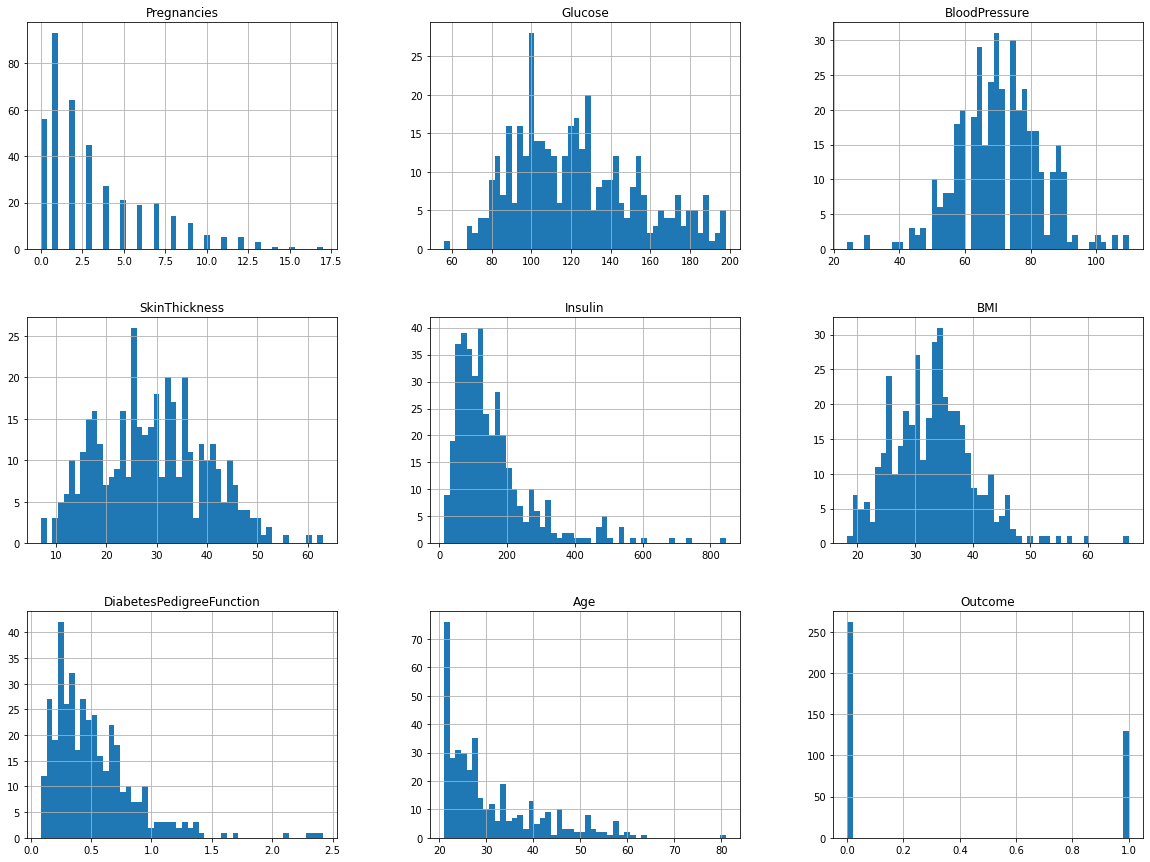

In [70]:
# Histogram
pima_all.hist(bins=50, figsize=(20, 15))
plt.show()

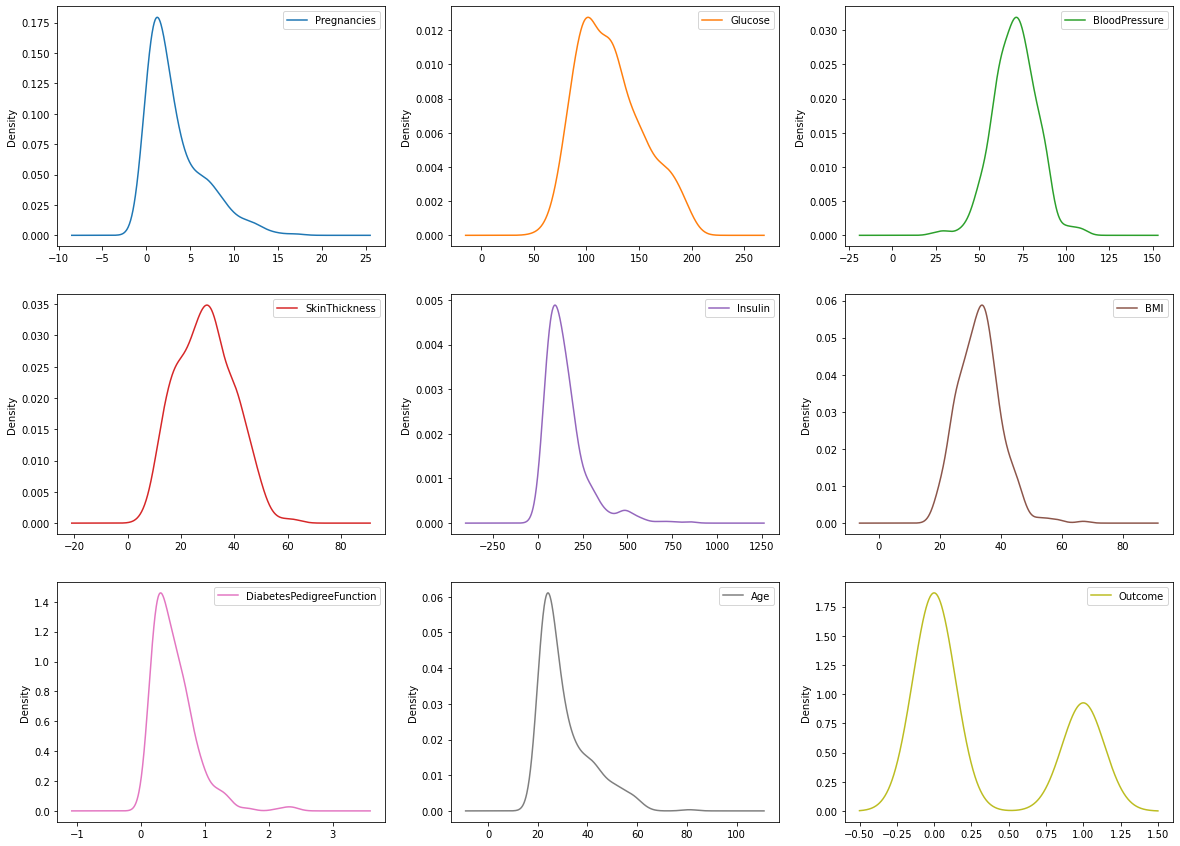

In [71]:
# Density plots for all attributes to visualize the distribution of each attribute
pima_all.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

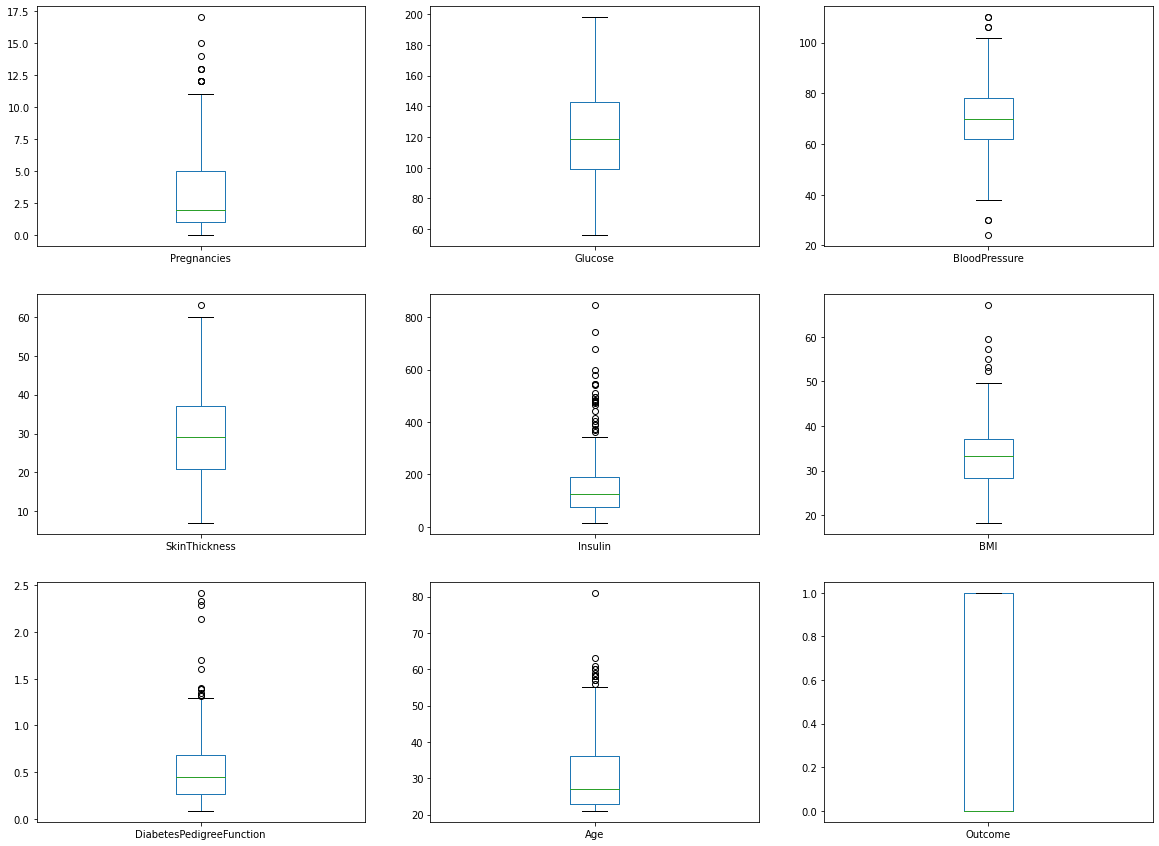

In [72]:
#Box and Whisker plot to visualize the distribution of all atributes
pima_all.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))

In [73]:
#Skew of attributes distributions
skew=pima_all.skew(axis = 1)

In [74]:
#Correlation¶

# Correlation between the different characteristics. Closer to 1 better is the correlation.

corr_matrix_pearson = pima_all.corr(method='pearson')
corr_matrix_pearson

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


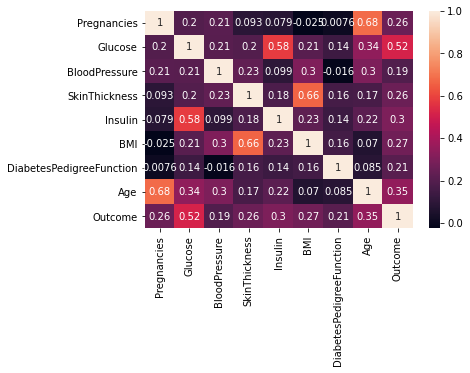

In [75]:
sns.heatmap(corr_matrix_pearson, annot = True)

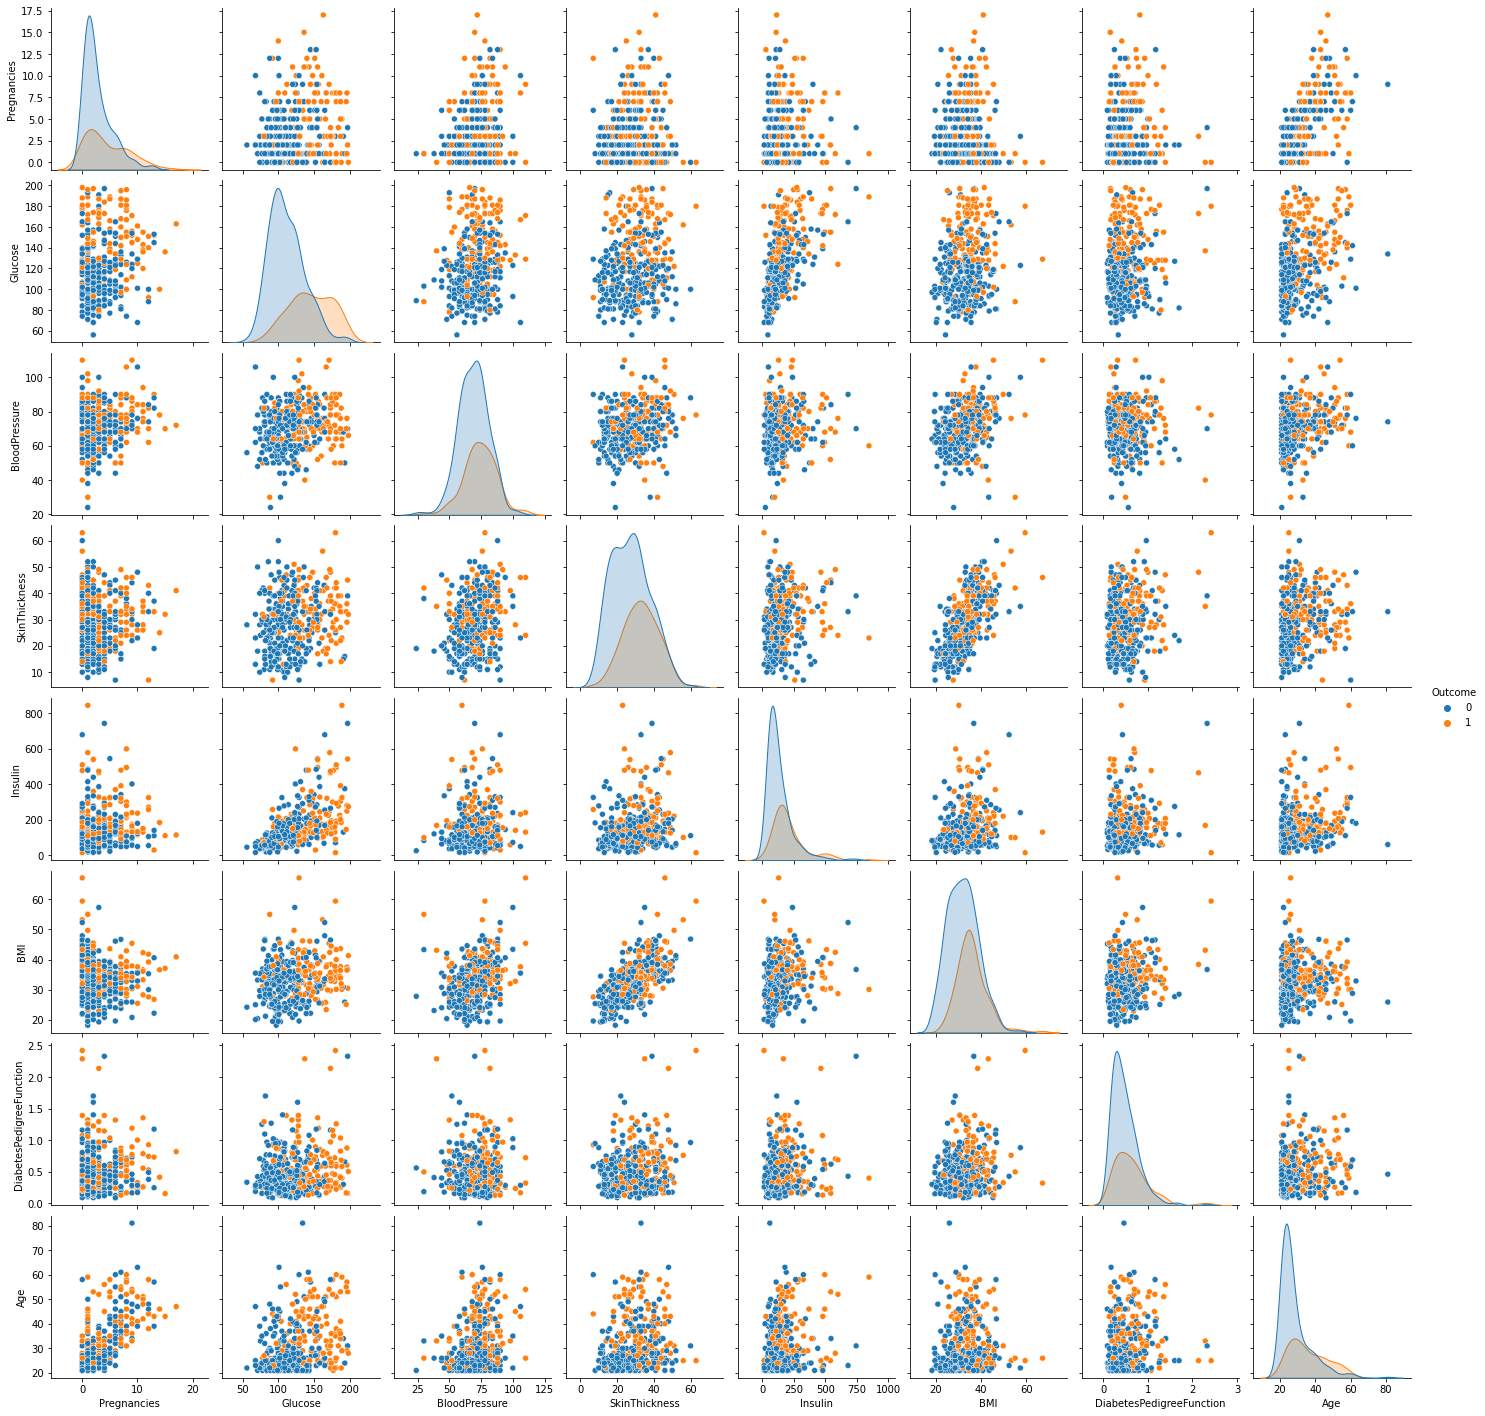

In [76]:
# Pairplot

sns.pairplot(pima_all, hue='Outcome')

In [77]:
#Logic Regression¶

#1st Iteration - 8 variables
var1=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"]
X=pima_all[var1]
y=pima_all.Outcome

In [78]:
## Defining the model and assigning Y (Dependent) and X (Independent Variables)
logit_model=sm.Logit(y,X)

## Fitting the model and publishing the results
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.563677
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Mon, 09 Aug 2021   Pseudo R-squ.:                  0.1128
Time:                        08:16:08   Log-Likelihood:                -220.96
converged:                       True   LL-Null:                       -249.05
Covariance Type:            nonrobust   LLR p-value:                 8.717e-10
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1299      0.049      2.655      0.008       0.034

In [79]:
#2nd Iteration - 3 variables
var2=["Pregnancies", "Glucose","BloodPressure"]
X=pima_all[var2]
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.574607
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  392
Model:                          Logit   Df Residuals:                      389
Method:                           MLE   Df Model:                            2
Date:                Mon, 09 Aug 2021   Pseudo R-squ.:                 0.09558
Time:                        08:16:24   Log-Likelihood:                -225.25
converged:                       True   LL-Null:                       -249.05
Covariance Type:            nonrobust   LLR p-value:                 4.597e-11
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Pregnancies       0.1405      0.037      3.826      0.000       0.069       0.212
Glucose           0.

In [80]:
logreg = LogisticRegression()
var2=["Pregnancies", "Glucose","BloodPressure"]
X=pima_all[var2]
y=pima_all.Outcome
logreg.fit(X,y)

## Defining the y_pred variable for the predicting values. 
y_pred=logreg.predict(X)

## Calculating the precision of the model
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       262
           1       0.68      0.55      0.61       130

    accuracy                           0.77       392
   macro avg       0.74      0.71      0.72       392
weighted avg       0.76      0.77      0.76       392



In [81]:
## Confusion matrix gives the number of cases that the model is able to accurately predict the outcomes, and the number of cases the model gives false positive and false negatives
confusion_matrix = confusion_matrix(y, y_pred)

In [82]:
confusion_matrix

array([[229,  33],
       [ 59,  71]])

In [83]:
#Classifier

# Predict the outcome - knn

inputs = pima_all[['Glucose', 'Insulin', 'SkinThickness', 'BMI', 'Age']]

In [84]:
outputs = pima_all['Outcome']

In [85]:
knn = nei.KNeighborsClassifier(n_neighbors=5)

In [86]:
knn.fit(inputs, outputs)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [87]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                     weights='uniform')

In [88]:
# Evaluate knn

(knn.predict(inputs) == outputs).sum()

322

In [89]:
#Split the train set - 1/3 is to test

inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs,outputs, test_size =0.33)

In [90]:
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [91]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                     weights='uniform')

In [92]:
(knn.predict(inputs_test) == outputs_test).sum()

97

In [93]:
#Count how many women are Positive (1) and Negative (0) for diabetes in the test set 

outputs_test.value_counts()

0    93
1    37
Name: Outcome, dtype: int64

In [94]:
#Check classification accuracy with knn = 5

outputs_pred = knn.predict(inputs_test)
accuracy = metrics.accuracy_score(outputs_test, outputs_pred)
accuracy

0.7461538461538462

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [97]:
# 10-fold cross-validation with knn = 5

scores = cross_val_score (knn, inputs, outputs, cv =10, scoring = 'accuracy')
scores

array([0.725     , 0.8       , 0.64102564, 0.61538462, 0.64102564,
       0.74358974, 0.66666667, 0.82051282, 0.76923077, 0.79487179])

In [98]:
scores.mean()

0.7217307692307692

In [99]:
#Optimal value of k

k_range = range(1,41)
k_scores = []

In [100]:
for k in k_range:
    knn = nei.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score (knn, inputs, outputs, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())

In [101]:
k_scores

[0.7222435897435897,
 0.7396794871794872,
 0.7297435897435897,
 0.7369871794871795,
 0.7217307692307692,
 0.7396153846153846,
 0.7522435897435897,
 0.7523717948717948,
 0.7499358974358974,
 0.7625641025641026,
 0.7702564102564102,
 0.7625641025641026,
 0.7652564102564102,
 0.7574358974358975,
 0.7473717948717948,
 0.7472435897435897,
 0.7575,
 0.7549358974358974,
 0.752371794871795,
 0.7575641025641026,
 0.755,
 0.7498076923076923,
 0.7472435897435897,
 0.7548717948717949,
 0.7472435897435898,
 0.7497435897435898,
 0.7471794871794872,
 0.7523076923076923,
 0.7471794871794872,
 0.7523076923076923,
 0.7548717948717949,
 0.7574358974358975,
 0.7548717948717949,
 0.7523717948717948,
 0.7574358974358975,
 0.7574358974358975,
 0.7676282051282051,
 0.7625641025641026,
 0.76,
 0.7599358974358974]

Text(0, 0.5, 'Cross-validation accuracy')

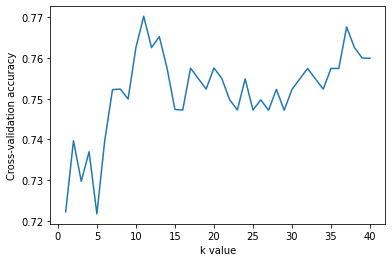

In [102]:
#Visualise best k number

plt.plot(k_range, k_scores)
plt.xlabel ('k value')
plt.ylabel('Cross-validation accuracy')

In [103]:
# Optimal value for k is 10

knn = nei.KNeighborsClassifier(n_neighbors=10)
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [104]:
(knn.predict(inputs_test) == outputs_test).sum()

105

In [105]:
outputs_pred = knn.predict(inputs_test)
accuracy = metrics.accuracy_score(outputs_test, outputs_pred)
accuracy #76.1%

0.8076923076923077

In [106]:
# 10-fold cross-validation with knn = 3

scores = cross_val_score (knn, inputs, outputs, cv =10, scoring = 'accuracy')
scores #accuracy scores arrays (from 61.5% to 84.6%)

array([0.8       , 0.8       , 0.69230769, 0.61538462, 0.69230769,
       0.84615385, 0.71794872, 0.87179487, 0.79487179, 0.79487179])

In [107]:
# Average accuracy score

scores.mean()

0.7625641025641026

In [108]:
#Cross Validation
#Recursive feature elimination with cross-validation¶

kf = KFold(10, False, 1)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [109]:
skf = StratifiedKFold(n_splits=10, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [110]:
lg = LogisticRegression()

In [111]:
rfecv = RFECV (estimator=lg,step=1, cv=skf, scoring='accuracy')

In [112]:
rfecv.fit(inputs, outputs)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=False),
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

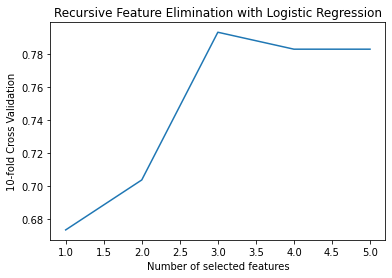

In [116]:
plt.figure()
plt.title('Recursive Feature Elimination with Logistic Regression')
plt.xlabel('Number of selected features')
plt.ylabel('10-fold Cross Validation')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

plt.show()

#Optical number of features (=5) more suitable to predict the outcome

In [117]:
feature_names = pima_all.columns[:10]
feature_names

Index(['Pregnancies', 'Glucose', 'Glucose Result', 'BloodPressure',
       'Percentile skin thickness', 'SkinThickness', 'Insulin', 'BMI',
       'Nutritional Status', 'DiabetesPedigreeFunction'],
      dtype='object')

In [118]:
X = pima_all[feature_names]

In [119]:
new_features = list(filter(lambda x: x[1],zip(feature_names, rfecv.support_)))
new_features

[('Pregnancies', True),
 ('BloodPressure', True),
 ('Percentile skin thickness', True)]

In [120]:
#Knn and Accuracy score - new features (inputs) and optimal k value

new_inputs = pima_all[['Pregnancies','Glucose', 'BloodPressure','SkinThickness']]

In [122]:
knn = nei.KNeighborsClassifier(n_neighbors=10)

In [123]:
knn.fit(new_inputs, outputs)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [124]:
(knn.predict(new_inputs) == outputs).sum()

303

In [125]:
new_inputs_train, new_inputs_test, outputs_train, outputs_test = mod.train_test_split(new_inputs,outputs, test_size =0.33)

In [126]:
knn.fit(new_inputs_train, outputs_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [127]:
(knn.predict(new_inputs_test) == outputs_test).sum()

95

In [128]:
outputs_pred_new_inputs = knn.predict(new_inputs_test)
accuracy = metrics.accuracy_score(outputs_test, outputs_pred_new_inputs)

In [129]:
accuracy

0.7307692307692307

In [130]:
scores = cross_val_score (knn, new_inputs, outputs, cv =10, scoring = 'accuracy')
scores.mean()

0.752628205128205

In [131]:
lg = LogisticRegression()

In [132]:
lg_accuracy = cross_val_score(lg,inputs,outputs,cv=10,scoring='accuracy')

In [133]:
lg_accuracy.mean()

0.7828846153846154

In [134]:
lg.fit(inputs_train,outputs_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [135]:
outputs_pred=lg.predict(inputs_test)
accuracy_lg = metrics.accuracy_score(outputs_test, outputs_pred)
accuracy_lg

0.6307692307692307

In [136]:
mnb = MultinomialNB()
mnb.fit(inputs_train, outputs_train)
out_pred = mnb.predict(inputs_test)
accuracy_mnb = accuracy_score(outputs_test, out_pred)
accuracy_mnb

0.4846153846153846

In [137]:
conf_mtx_nb = metrics.confusion_matrix(outputs_test, out_pred)
conf_mtx_nb

array([[35, 46],
       [21, 28]])

In [138]:
conf_mtx_new_features = metrics.confusion_matrix(outputs_test, outputs_pred_new_inputs)
conf_mtx_new_features

array([[73,  8],
       [27, 22]])

In [ ]:
precision_nb = metrics.precision_score(outputs_test, out_pred)
precision_nb

In [141]:
precision_new_features = metrics.precision_score(outputs_test,outputs_pred_new_inputs)
precision_new_features

0.7333333333333333

In [140]:
recall = metrics.recall_score(outputs_test, out_pred)
recall

0.5714285714285714

In [142]:
recall_new_features = metrics.recall_score(outputs_test,outputs_pred_new_inputs)
recall_new_features

0.4489795918367347

In [143]:
class_rep = classification_report(outputs_test, out_pred)
class_rep

'              precision    recall  f1-score   support\n\n           0       0.62      0.43      0.51        81\n           1       0.38      0.57      0.46        49\n\n    accuracy                           0.48       130\n   macro avg       0.50      0.50      0.48       130\nweighted avg       0.53      0.48      0.49       130\n'

In [144]:
out_pred_prob = mnb.predict_proba(inputs_test)[:,1]
out_pred_prob

array([8.23986657e-01, 9.69143466e-01, 1.33426085e-01, 7.53350913e-01,
       1.33712248e-04, 9.37461426e-02, 4.65771890e-01, 2.40471788e-01,
       7.98379082e-01, 7.83857924e-01, 3.60822925e-01, 6.03020451e-01,
       8.25053073e-01, 4.99130929e-01, 4.15293204e-01, 3.30885430e-01,
       8.39466836e-01, 2.45817714e-01, 1.50718481e-01, 6.99637032e-01,
       8.59828294e-01, 3.85612768e-01, 7.69492789e-02, 8.14595646e-02,
       7.31714278e-01, 8.81075515e-01, 8.96547588e-01, 3.19820416e-01,
       7.09442996e-01, 9.21537066e-01, 7.39829023e-01, 6.10463631e-01,
       4.02389116e-01, 7.05852030e-01, 3.95073322e-01, 1.53707747e-06,
       5.67784909e-01, 4.85134372e-01, 9.75651395e-01, 8.67248651e-01,
       7.79080218e-01, 2.28535986e-01, 3.67738430e-01, 8.27362375e-01,
       1.52082393e-01, 4.67363578e-10, 9.52540936e-01, 9.94268549e-01,
       6.71444975e-01, 5.37111169e-01, 3.10616719e-01, 6.92287393e-01,
       8.16599088e-01, 4.56954849e-01, 1.41935901e-01, 7.26626275e-01,
      

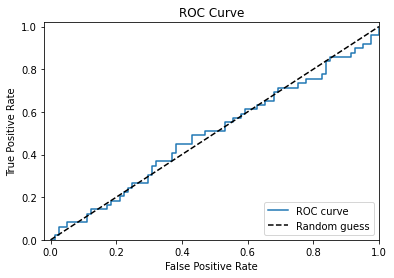

In [145]:
fpr, tpr, thresholds = roc_curve(outputs_test, out_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [146]:
ras = roc_auc_score(outputs_test, out_pred_prob)
ras

0.4960947341899723

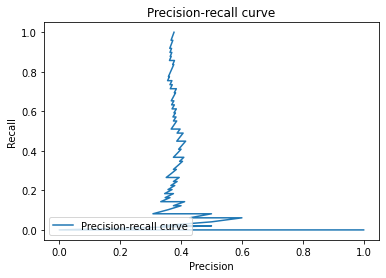

In [147]:
precision, recall, thresholds = precision_recall_curve(outputs_test, out_pred_prob)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

In [148]:
aps = average_precision_score(outputs_test, out_pred_prob)
aps

0.3938624371932624